In [103]:
import numpy as np
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt
%matplotlib inline
from icedef import statoil_arcticnet_data as sd
from icedef import plot
plt.rcParams['figure.figsize'] = (10.0, 10.0)
plot_dir = './plots/'

# BEACON

In [107]:
df_by_id = {}
for beacon_csv_filename in sd.beacon_csv_filenames:
    df = sd.get_df(sd.beacon_dir_path + beacon_csv_filename)
    beacon_id = df['BeaconID'][0]
    df_by_id[beacon_id] = df

In [108]:
latlons = []
labels = []

for beacon_id, df in df_by_id.items():
    lats, lons = df['Latitude'].values, df['Longitude'].values
    latlons.append([lats, lons])
    labels.append(beacon_id)

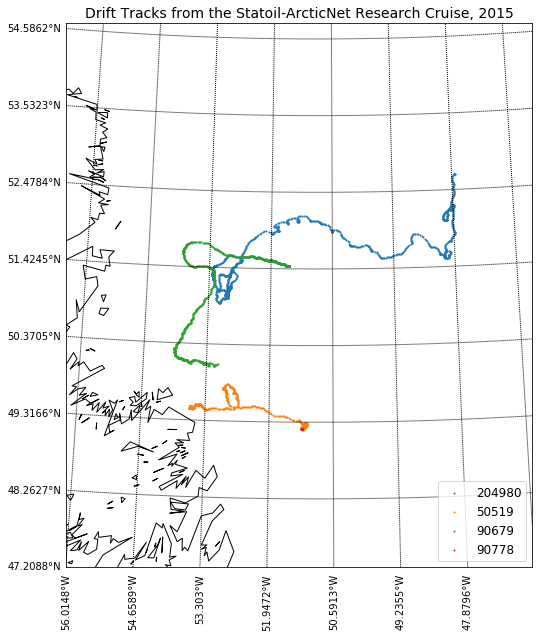

In [112]:
title = 'Drift Tracks from the Statoil-ArcticNet Research Cruise, 2015'
pads = [2] * 4
map_kwargs = {'pads': pads}
scatter_kwargs = {'s': 1}
kwargs ={'labels': labels, 'title': title, 'map_kwargs': map_kwargs, 'scatter_kwargs': scatter_kwargs}
fig, ax = plot.plot_track(*latlons, **kwargs)
fig.savefig(plot_dir + 'beacon_drift_tracks.png')

Initially, there were two iceberg's -- each with two beacon's attached. One iceberg, which we will call, "iceberg 1" had the beacon's: 50519 and 90778, the other, which we will call, "iceberg 2", had the beacon's 204980 and 90679. The beacon's onboard iceberg 1 were initially attached around 7 PM on April 23rd, 2015; however, after just one hour, beacon 90778 fell off leaving just beacon 50519 onboard iceberg 1 where it remained until around 2 PM on June 1st of that same year. Iceberg 2, on the other hand, has a more interesting life story. On April 24th, 2015 around 3 PM, both beacon's (204980 and 90679) were installed aboard iceberg 2. However, at around TODO, iceberg 2 split forming what we will call iceberg's 3 and 4 with beacon's 204980 and 90670; respectively. When this occurred, iceberg 2 was travelling roughly due West but after the split, iceberg 3 began moving Southwest and iceberg 4 went Northwest. Unfortunately, there is no data on the individual sizes of these bergs.

In [16]:
stats_df = pd.DataFrame(columns=['beacon_id', 'start_time', 'end_time', 'time_length', 
                                 'start_latitude', 'start_longitude',
                                 'end_latitude', 'end_longitude'])
for beacon_id, df in df_by_id.items():
    start_time = df['DataDate_UTC'][0]
    end_time = df['DataDate_UTC'][len(df['DataDate_UTC']) - 1]
    start_lat = df['Latitude'][0]
    end_lat = df['Latitude'][len(df['Latitude']) - 1]
    start_lon = df['Longitude'][0]
    end_lon = df['Longitude'][len(df['Longitude']) - 1]
    stats_df.loc[len(stats_df)] = [beacon_id, start_time, end_time, end_time - start_time, 
                                   start_lat, start_lon, end_lat, end_lon]

In [17]:
stats_df

beacon_id          start_time            end_time      time_length  \
0    204980 2015-04-24 15:16:06 2015-06-13 09:33:42 49 days 18:17:36   
1     50519 2015-04-23 18:48:37 2015-06-01 02:09:54 38 days 07:21:17   
2     90679 2015-04-24 15:21:03 2015-05-25 01:20:03 30 days 09:59:00   
3     90778 2015-04-23 18:53:57 2015-04-23 19:57:39  0 days 01:03:42   

   start_latitude  start_longitude  end_latitude  end_longitude  
0        51.45991        -51.55144      52.69404      -47.82604  
1        49.22403        -51.25820      49.46962      -53.58547  
2        51.46240        -51.55285      50.09155      -53.06512  
3        49.22347        -51.25890      49.22226      -51.24820

# AVOS

In [18]:
avos_df = sd.get_avos_df()

/home/evankielley/IceDEF/icedef/statoil_arcticnet_data.py:38: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df = pd.read_csv(path, sep=' ; ')


In [114]:
avos_df_subset = avos_df.loc[(avos_df['time'] >= min(stats_df['start_time'])) & 
                             (avos_df['time'] <= max(stats_df['end_time'])) &
                             (avos_df['longitude'] >= -55)]

In [115]:
# Note this takes really long to run
#plot.plot_track([avos_df['latitude'].values, avos_df['longitude'].values])

In [116]:
avos_df_subset.tail()

time  latitude  longitude  direction  speed  \
238 2015-04-27 04:00:00      51.4      -54.1         70     16   
239 2015-04-27 05:00:00      51.5      -54.3         70     17   
240 2015-04-27 06:00:00      51.6      -54.5         50     19   
241 2015-04-27 07:00:00      51.7      -54.7         50     19   
242 2015-04-27 08:00:00      51.8      -54.9         60     19   

     air_temperature water_temperature  eastward_velocity  northward_velocity  
238              1.5              -0.9         -15.035082           -5.472322  
239              1.8              -0.9         -15.974775           -5.814342  
240              1.4              -1.0         -14.554844          -12.212965  
241              1.9              -1.1         -14.554844          -12.212965  
242              2.0              -1.0         -16.454483           -9.500000

In [117]:
avos_df.loc[449]

time                  2015-07-10 00:00:00
latitude                             46.8
longitude                           -71.2
direction                              20
speed                                   2
air_temperature                      23.2
water_temperature                     NaN
eastward_velocity                -0.68404
northward_velocity               -1.87939
Name: 449, dtype: object

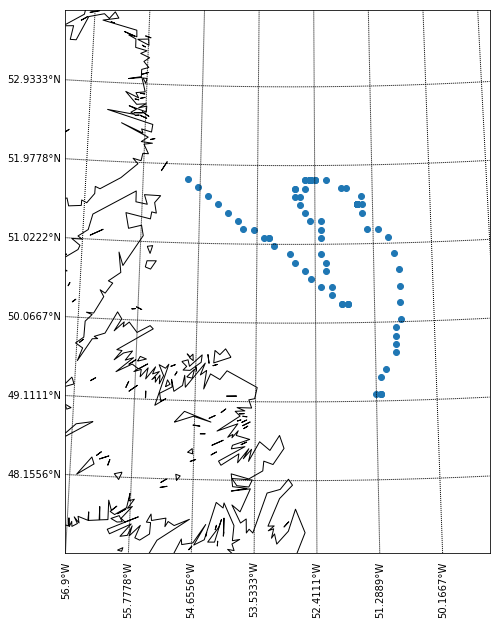

In [119]:
pads = [2] * 4
map_kwargs = {'pads': pads}
kwargs = {'map_kwargs': map_kwargs}
fig, ax = plot.plot_track([avos_df_subset['latitude'].values, avos_df_subset['longitude'].values], **kwargs)

Note: the ship went back to port after they placed the beacons. It then stayed in port from 2015-05-05 23:00 until 2015-07-10 00:00. 

# ADCP

In [21]:
adcp_ds = sd.get_adcp_ds()

In [120]:
adcp_ds_subset = adcp_ds.where((adcp_ds.time >= np.datetime64(min(stats_df['start_time']))) &
                               (adcp_ds.time <= np.datetime64(max(stats_df['end_time']))) &
                               (adcp_ds.longitude >= -55), drop=True)

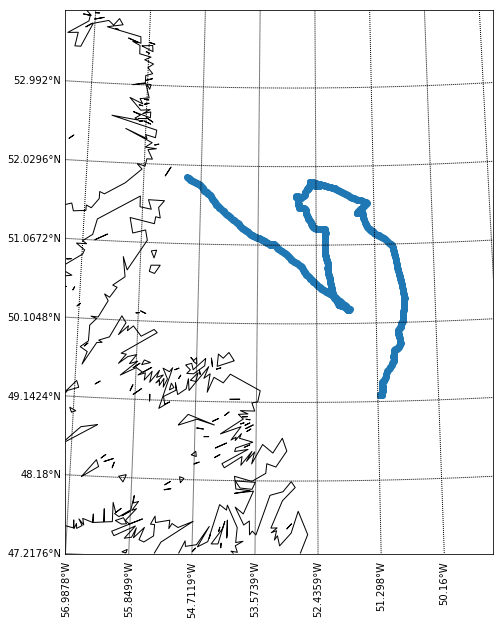

In [122]:
pads = [2] * 4
map_kwargs = {'pads': pads}
kwargs = {'map_kwargs': map_kwargs}
fig, ax = plot.plot_track([adcp_ds_subset.latitude.values, adcp_ds_subset.longitude.values], **kwargs)

# AVOS and ADCP

In [123]:
from importlib import reload
reload(plot)

<module 'icedef.plot' from '/home/evankielley/IceDEF/icedef/plot.py'>

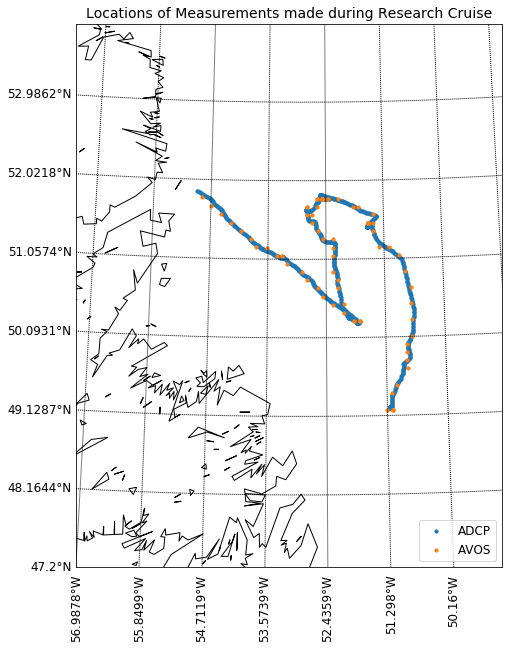

In [126]:
title = 'Locations of Measurements made during Research Cruise'
pads = [2] * 4
labels = ['ADCP', 'AVOS']
map_kwargs = {'pads': pads}
scatter_kwargs = {'s': 10}
legend_kwargs = {'loc': 4}

kwargs = {'labels': labels,
          'title': title,
          'map_kwargs': map_kwargs,
          'scatter_kwargs': scatter_kwargs, 
          'legend_kwargs': legend_kwargs}

fig, ax = plot.plot_track([adcp_ds_subset.latitude.values, adcp_ds_subset.longitude.values],
                          [avos_df_subset['latitude'].values, avos_df_subset['longitude'].values], **kwargs)
fig.savefig(plot_dir + 'adcp_avos_location.png')

In [128]:
adcp_ds.depth[-1]

<xarray.DataArray 'depth' (depth_cell: 45)>
array([ 23.17,  31.17,  39.17,  47.17,  55.17,  63.17,  71.17,  79.17,  87.17,
        95.17, 103.17, 111.17, 119.17, 127.17, 135.17, 143.17, 151.17, 159.17,
       167.17, 175.17, 183.17, 191.17, 199.17, 207.17, 215.17, 223.17, 231.17,
       239.17, 247.17, 255.17, 263.17, 271.17, 279.17, 287.17, 295.17, 303.17,
       311.17, 319.17, 327.17, 335.17, 343.17, 351.17, 359.17, 367.17, 375.17],
      dtype=float32)
Coordinates:
    time     datetime64[ns] 2015-05-03T10:24:40
Dimensions without coordinates: depth_cell
Attributes:
    C_format:   %8.2f
    positive:   down
    long_name:  Depth
    data_min:   23.17
    units:      meter
    data_max:   375.37